<a href="https://colab.research.google.com/github/farafiroza/Mini-Proyek-Pemograman-Dasar/blob/main/Proyek_Pengantar_Komputasi_Zoo_Data_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving zoo_data-1.csv to zoo_data-1 (1).csv


In [ ]:
# Load data
df = pd.read_csv('zoo_data-1.csv')

In [ ]:
# Lihat info awal
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
dtypes: int64(16), object(1)
memory usage: 13.5+ KB


In [ ]:
df.isnull().sum()

,0
animal_name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [ ]:
# Data Cleaning
df_clean = df.dropna()  # Buang baris kosong

In [ ]:
# Pastikan kolom numerik bertipe angka
df_clean['legs'] = pd.to_numeric(df_clean['legs'], errors='coerce')
df_clean['hair'] = pd.to_numeric(df_clean['hair'], errors='coerce')

In [ ]:
# Drop ulang jika ada NaN baru
df_clean = df_clean.dropna()

In [ ]:
# Hapus outlier berdasarkan z-score di kolom legs
df_clean = df_clean[(np.abs(stats.zscore(df_clean['legs'])) < 3)]

In [ ]:
 # Statistik dasar
print("Rata-rata jumlah kaki: ", df_clean['legs'].mean())
print("Median jumlah kaki: ", df_clean['legs'].median())
print("Standar deviasi jumlah kaki: ", df_clean['legs'].std())
print("Jumlah data: ", df_clean.shape[0])
print(df_clean.describe())

Rata-rata jumlah kaki:  2.8415841584158414
Median jumlah kaki:  4.0
Standar deviasi jumlah kaki:  2.0333847312662052
Jumlah data:  101
             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000 

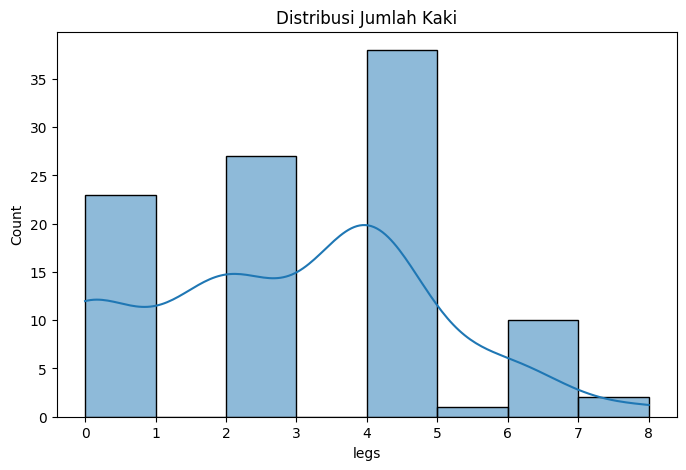

In [ ]:
# Visualisasi - Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['legs'], bins=8, kde=True)
plt.title("Distribusi Jumlah Kaki")
plt.show()

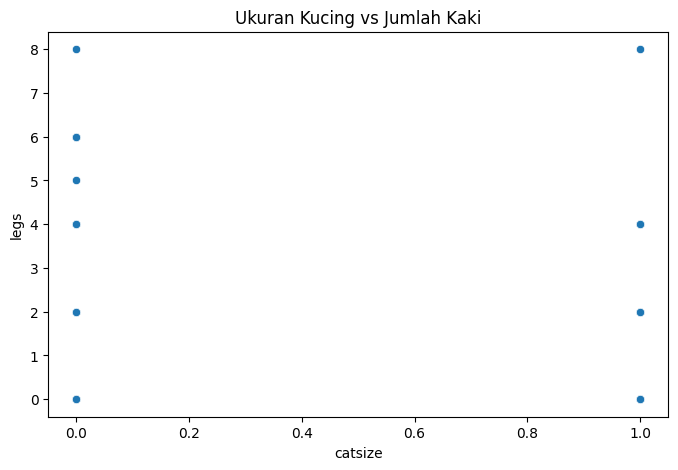

In [ ]:
# Visualisasi - Scatter plot antara catsize dan jumlah kaki
plt.figure(figsize=(8, 5))
sns.scatterplot(x='catsize', y='legs', data=df_clean)
plt.title("Ukuran Kucing vs Jumlah Kaki")
plt.show()

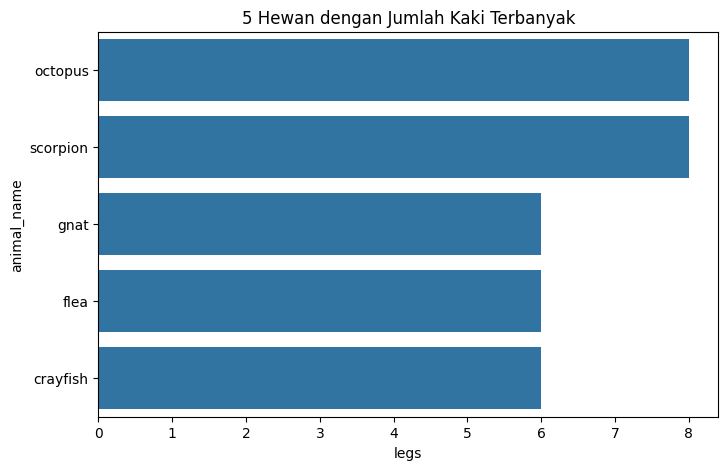

In [ ]:
# Visualisasi - Bar chart 5 hewan dengan kaki terbanyak
top5 = df_clean.sort_values('legs', ascending=False).head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x='legs', y='animal_name', data=top5)
plt.title("5 Hewan dengan Jumlah Kaki Terbanyak")
plt.show()